# Data Cleaning and Preparation

In this notebook, we will cover the concepts of:
- Data preprocessing
- Data cleaning
- Normalization & Standardization
- Data encoding

## Introduction

Data preprocessing is a crucial step in any machine learning project. It involves several important sub-steps such as data cleaning, normalization, standardization, and data encoding. In this notebook, we will explore these concepts using practical examples and visualizations.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Displaying library versions for reference
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


Pandas version: 1.5.3
Numpy version: 1.24.3
Seaborn version: 0.12.2


## Generating and Loading Data

To illustrate the different steps of data preprocessing, we will generate a synthetic dataset. Let's start by generating and loading the data.


In [2]:
# Generating a synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.randint(30000, 120000, size=100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'experience': np.random.randint(1, 40, size=100)
})

# Introducing missing values
data.loc[5:15, 'salary'] = np.nan
data.loc[20:25, 'city'] = np.nan

# Displaying the first few rows of the dataset
data.head()


,age,salary,city,gender,experience
0,56,91228.0,Los Angeles,Male,13
1,69,78984.0,Chicago,Female,7
2,46,70774.0,New York,Male,36
3,32,32568.0,Phoenix,Female,20
4,60,92592.0,New York,Female,1


## Data Cleaning

Data cleaning involves several steps such as handling missing values, removing duplicates, and correcting outliers. We will address these aspects one by one.

### Handling Missing Values
Missing data can bias the results of data analysis and machine learning models. We can handle missing values by removing them or imputing them with appropriate values.


In [3]:
# Identifying missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age            0
salary        11
city           6
gender         0
experience     0
dtype: int64


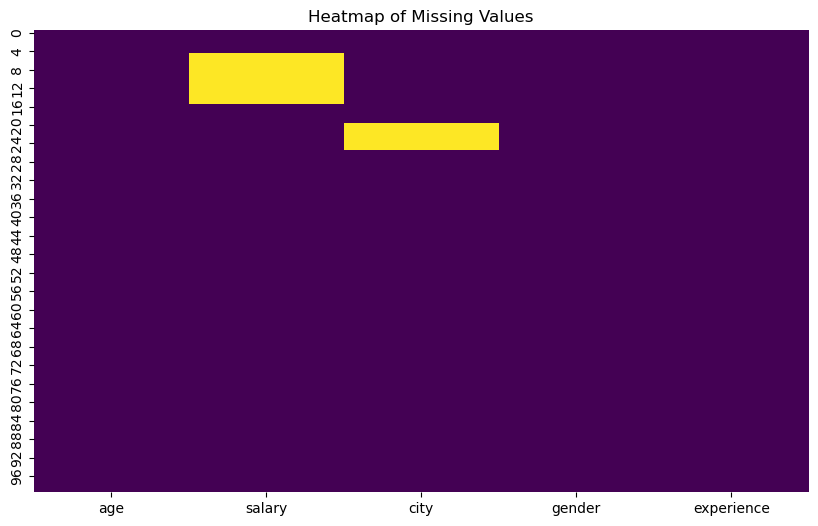

In [4]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [5]:
# Removing rows with missing values
data_cleaned = data.dropna()

In [6]:
# Verifying after removal
print("Data after removing missing values:")
data_cleaned.head()

Data after removing missing values:


,age,salary,city,gender,experience
0,56,91228.0,Los Angeles,Male,13
1,69,78984.0,Chicago,Female,7
2,46,70774.0,New York,Male,36
3,32,32568.0,Phoenix,Female,20
4,60,92592.0,New York,Female,1


In [7]:
# Identifying missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
age           0
salary        0
city          0
gender        0
experience    0
dtype: int64


### Removing Duplicates

Duplicate rows can skew analysis and should be removed.


In [8]:
# Introducing duplicate rows for demonstration
data_cleaned = pd.concat([data_cleaned, data_cleaned.iloc[[0]]])

# Removing duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Verifying after removing duplicates
print("Data after removing duplicates:")
data_cleaned.head()

Data after removing duplicates:


,age,salary,city,gender,experience
0,56,91228.0,Los Angeles,Male,13
1,69,78984.0,Chicago,Female,7
2,46,70774.0,New York,Male,36
3,32,32568.0,Phoenix,Female,20
4,60,92592.0,New York,Female,1


## Normalization & Standardization

Normalization and standardization are techniques for transforming data that are often necessary for machine learning algorithms. Normalization scales the data to have values between 0 and 1, while standardization transforms the data to have a mean of 0 and a standard deviation of 1.

### Normalization
Normalization is particularly useful when you do not know the distribution of the data or when you want to maintain the data's range and ratios.


Normalized data:


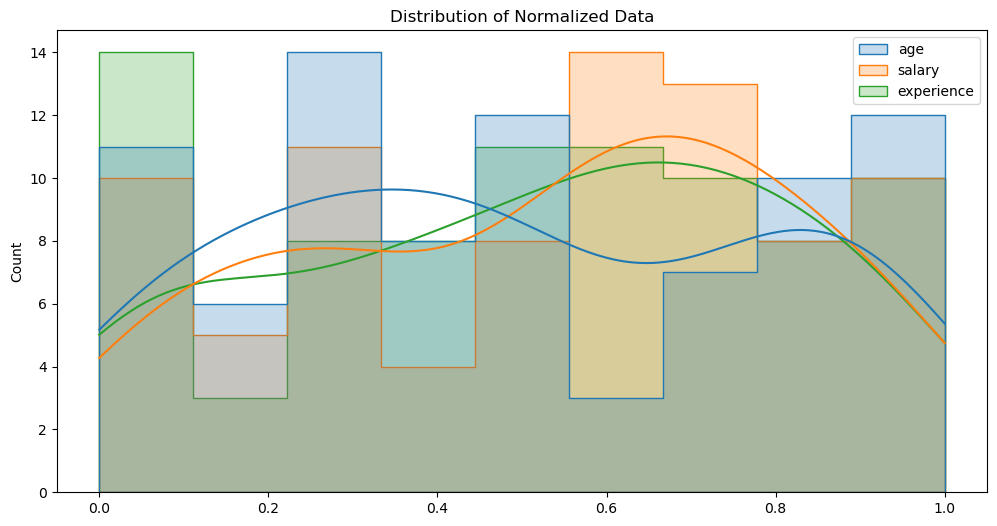

In [9]:
# Normalizing the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned.select_dtypes(include=[np.number]))

# Converting to DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data_cleaned.select_dtypes(include=[np.number]).columns)

# Displaying normalized data
print("Normalized data:")
data_normalized.head()

# Visualizing normalized data
plt.figure(figsize=(12, 6))
sns.histplot(data_normalized, kde=True, element="step")
plt.title('Distribution of Normalized Data')
plt.show()


### Standardization

Standardization is useful when the data follows a Gaussian distribution and you want to transform the data to have a mean of 0 and a standard deviation of 1.


Standardized data:


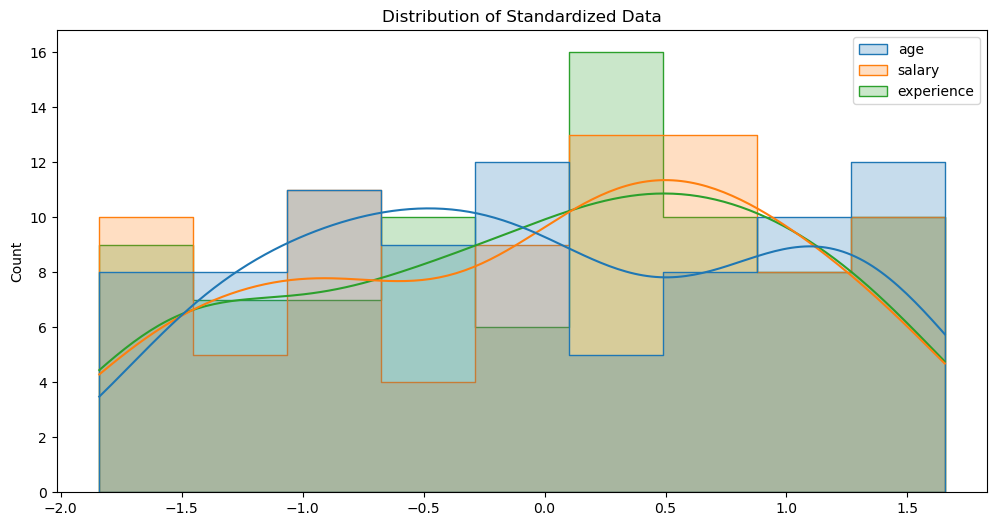

In [10]:
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned.select_dtypes(include=[np.number]))

# Converting to DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=data_cleaned.select_dtypes(include=[np.number]).columns)

# Displaying standardized data
print("Standardized data:")
data_standardized.head()

# Visualizing standardized data
plt.figure(figsize=(12, 6))
sns.histplot(data_standardized, kde=True, element="step")
plt.title('Distribution of Standardized Data')
plt.show()


## Data Encoding

Machine learning algorithms often require categorical data to be converted into numerical form. We will cover two common methods: Label Encoding and One-Hot Encoding.

### Label Encoding
Label Encoding converts categorical labels into integer values. This method is useful for ordinal data where the order matters. In this example, we will apply Label Encoding to the `city` column.


In [11]:
# Label Encoding for the 'city' column
label_encoder = LabelEncoder()
data_encoded = data_cleaned.copy()

data_encoded['city'] = label_encoder.fit_transform(data_encoded['city'])

# Displaying encoded data
print("Data after Label Encoding for 'city':")
data_encoded.head()

print(data_encoded)

Data after Label Encoding for 'city':
    age    salary  city  gender  experience
0    56   91228.0     2    Male          13
1    69   78984.0     0  Female           7
2    46   70774.0     3    Male          36
3    32   32568.0     4  Female          20
4    60   92592.0     3  Female           1
..  ...       ...   ...     ...         ...
95   42   69353.0     0  Female          32
96   62   92003.0     3    Male          27
97   58  113211.0     3  Female          20
98   46   82733.0     1    Male          24
99   32   95318.0     0  Female          12

[83 rows x 5 columns]


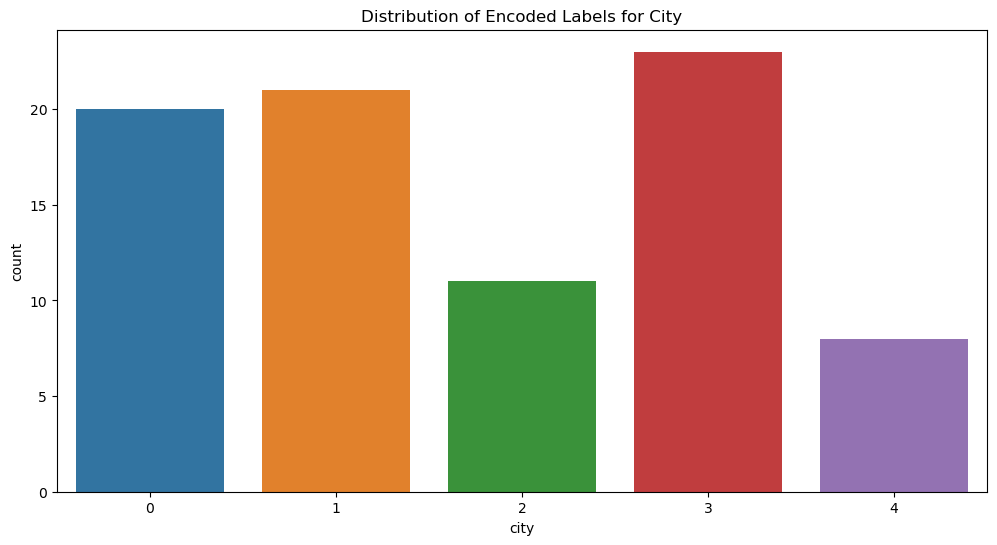

In [12]:
# Visualizing encoded data for 'city'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='city')
plt.title('Distribution of Encoded Labels for City')
plt.show()

### One-Hot Encoding

One-Hot Encoding converts categorical labels into a set of binary columns. This method is useful for nominal data where the order does not matter. In this example, we will apply One-Hot Encoding to the `gender` column.


In [13]:
# One-Hot Encoding for the 'gender' column
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = onehot_encoder.fit_transform(data_encoded[['gender']])

# Creating a DataFrame with One-Hot Encoded values
gender_encoded_df = pd.DataFrame(gender_encoded, columns=onehot_encoder.get_feature_names_out(['gender']))

# Concatenating the One-Hot Encoded columns with the original DataFrame
data_encoded = pd.concat([data_encoded, gender_encoded_df], axis=1).drop('gender', axis=1)

# Displaying One-Hot Encoded data
print("Data after One-Hot Encoding for 'gender':")
data_encoded.head()

Data after One-Hot Encoding for 'gender':


,age,salary,city,experience,gender_Male
0,56.0,91228.0,2.0,13.0,1.0
1,69.0,78984.0,0.0,7.0,0.0
2,46.0,70774.0,3.0,36.0,1.0
3,32.0,32568.0,4.0,20.0,0.0
4,60.0,92592.0,3.0,1.0,0.0
